# Réglages de l'Asservissement du Robot

Ce bloc-note a pour objectif de garder une trace écrite de nos tests de réglage de l'asservissement du robot.

## Réglage de l'Odométrie

TODO

## Analyse des Courbes de Réponse du Robot

Dans cette partie, on suppose que le réglage de l'odométrie du robot a déjà été effectué.
On a donc accès aux positions et angles du robot à tout instant.

On suppose également que les moteurs sont commandables, i.e. que l'on peut envoyer la puissance souhaitée à chacun des moteurs.

### Première série de tests

Dans un premier temps, on a décidé de regarder la réponse du Robot quand on alimente ses moteurs avec différentes puissances. On a effectué 10 tests en envoyant la même puissance aux 2 moteurs: 10%, 20%, ... 100%

$x^2$

In [2]:
# importer le module "csv" du package "asserv" (fichier csv.py dans le dossier asserv)
# créé pour faciliter la manipulation des données de test recueillies
import asserv.csv
import numpy as np

# champs de données dans les fichiers csv
champs_x = [(), ('x',float)]
champs_y = [(), ('y',float)]

# liste des fichiers à importer dans un dictionnaire
x_csv = {
    '10':'mesures/pwm_2016-04-13/x_10.csv',
    '20':'mesures/pwm_2016-04-13/x_20.csv',
    '30':'mesures/pwm_2016-04-13/x_30.csv',
    '40':'mesures/pwm_2016-04-13/x_40.csv',
    '50':'mesures/pwm_2016-04-13/x_50.csv',
    '60':'mesures/pwm_2016-04-13/x_60.csv',
    '70':'mesures/pwm_2016-04-13/x_70.csv',
    '80':'mesures/pwm_2016-04-13/x_80.csv',
    '90':'mesures/pwm_2016-04-13/x_90.csv',
    '100':'mesures/pwm_2016-04-13/x_100.csv',
    }
y_csv = {
    '10':'mesures/pwm_2016-04-13/y_10.csv',
    '20':'mesures/pwm_2016-04-13/y_20.csv',
    '30':'mesures/pwm_2016-04-13/y_30.csv',
    '40':'mesures/pwm_2016-04-13/y_40.csv',
    '50':'mesures/pwm_2016-04-13/y_50.csv',
    '60':'mesures/pwm_2016-04-13/y_60.csv',
    '70':'mesures/pwm_2016-04-13/y_70.csv',
    '80':'mesures/pwm_2016-04-13/y_80.csv',
    '90':'mesures/pwm_2016-04-13/y_90.csv',
    '100':'mesures/pwm_2016-04-13/y_100.csv',
    }

# s1 (pour série 1) est le dictionnaire qui contient nos résultats pour la première série de tests.
s1 = {puissance:dict() for puissance in x_csv.keys()}

# ajout des x à s1
for puissance, fichier in x_csv.items():
    s1[puissance].update( asserv.csv.import_data(fichier, champs_x) )

# ajout des y à s1
for puissance, fichier in y_csv.items():
    s1[puissance].update( asserv.csv.import_data(fichier, champs_y) )

# conversion des listes en matrices numpy
for puissance, mesures in s1.items():
    mesures['x'] = np.array(mesures['x'])
    mesures['y'] = np.array(mesures['y'])

# durée de l'échantillonage
dt = 0.005

# calcul et ajout des vitesses à s1
for puissance, mesures in s1.items():
    x = mesures['x']
    y = mesures['y']
    dx = np.hstack((0, x[1:] - x[:-1]))
    dy = np.hstack((0, y[1:] - y[:-1]))
    mesures['v'] = np.sqrt(dx**2 + dy**2)/dt

In [3]:
# calcul et ajout des accélérations à s1
for puissance, mesures in s1.items():
    mesures['a'] = np.hstack((0, mesures['v'][1:] - mesures['v'][:-1]))

<IPython.core.display.Javascript object>


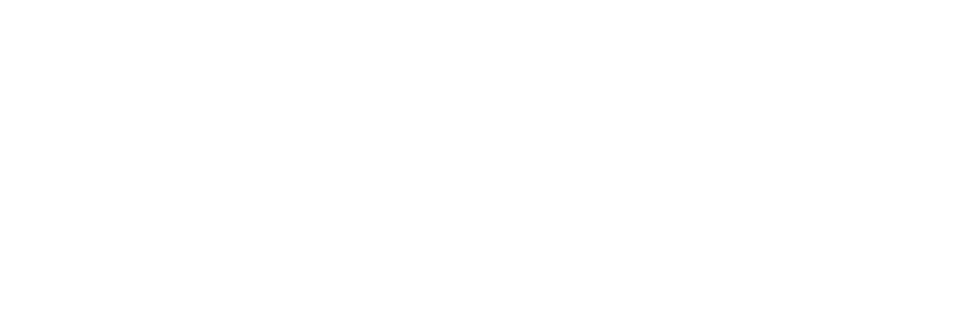

In [4]:
%matplotlib notebook

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,4))
plt.plot(s1['50']['v'])
plt.ylabel('vitesse à pwm = 50%')
plt.show()

In [5]:
plt.plot(s1['100']['v'])

# Tests d'accélération et décélération

In [6]:
x_csv = {
    '1':'mesures/pwm_full_2016-04-17/x1.csv',
    '2':'mesures/pwm_full_2016-04-17/x2.csv',
    '3':'mesures/pwm_full_2016-04-17/x3_80.csv',
    '4':'mesures/pwm_full_2016-04-17/x4_30.csv',
    '5':'mesures/pwm_full_2016-04-17/x5_80_0.csv',
    '6':'mesures/pwm_full_2016-04-17/x6_80_decroissant.csv',
    }
y_csv = {
    '1':'mesures/pwm_full_2016-04-17/y1.csv',
    '2':'mesures/pwm_full_2016-04-17/y2.csv',
    '3':'mesures/pwm_full_2016-04-17/y3_80.csv',
    '4':'mesures/pwm_full_2016-04-17/y4_30.csv',
    '5':'mesures/pwm_full_2016-04-17/y5_80_0.csv',
    '6':'mesures/pwm_full_2016-04-17/y6_80_decroissant.csv',
    }

In [7]:
s2 = {indice:dict() for indice in x_csv.keys()}

# ajout des x à s2
for puissance, fichier in x_csv.items():
    s2[puissance].update( asserv.csv.import_data(fichier, champs_x) )

# ajout des y à s2
for puissance, fichier in y_csv.items():
    s2[puissance].update( asserv.csv.import_data(fichier, champs_y) )

# conversion des listes en matrices numpy
for puissance, mesures in s2.items():
    mesures['x'] = np.array(mesures['x'])
    mesures['y'] = np.array(mesures['y'])

# calcul et ajout des vitesses à s2
for puissance, mesures in s2.items():
    x = mesures['x']
    y = mesures['y']
    dx = np.hstack((0, x[1:] - x[:-1]))
    dy = np.hstack((0, y[1:] - y[:-1]))
    mesures['v'] = np.sqrt(dx**2 + dy**2)/dt

In [8]:
plt.plot(s2['5']['v'])
plt.plot(s2['6']['v'])
plt.show()

In [9]:
# champs de données dans les fichiers csv
champs_v = [(), ('v',float)]
champs_vo = [(), ('vo',float)]

v_csv = {
    '1':'mesures/speed_2016-04-17/v2_k40.csv',
    '2':'mesures/speed_2016-04-17/v2_k80.csv',
    '3':'mesures/speed_2016-04-17/v2_k160.csv',
    '4':'mesures/speed_2016-04-17/v2_k320.csv',
    '5':'mesures/speed_2016-04-17/v2_k100.csv',
    '6':'mesures/speed_2016-04-17/v2_k100_mu02.csv',
    '7':'mesures/speed_2016-04-17/v2_k160_mu02.csv',
    '8':'mesures/speed_2016-04-17/v2_k160_mu02_ki20_imax1.csv',
    '10':'mesures/speed_2016-04-17/v4_k160_mu02_ki20_imax1.csv',
    '11':'mesures/speed_2016-04-17/v4_k160_mu02_ki20_imax2.csv',
    '12':'mesures/speed_2016-04-17/v8_k160_mu02_ki20_imax2.csv',
    '13':'mesures/speed_2016-04-17/v8_k160_mu02_ki20_imax4.csv',
    '14':'mesures/speed_2016-04-17/v8_k160_mu02_ki20_imax4_imoy.csv',
    }
vo_csv = {
    '1':'mesures/speed_2016-04-17/vo2_k40.csv',
    '2':'mesures/speed_2016-04-17/vo2_k80.csv',
    '3':'mesures/speed_2016-04-17/vo2_k160.csv',
    '4':'mesures/speed_2016-04-17/vo2_k320.csv',
    '5':'mesures/speed_2016-04-17/vo2_k100.csv',
    '6':'mesures/speed_2016-04-17/vo2_k100_mu02.csv',
    '7':'mesures/speed_2016-04-17/vo2_k160_mu02.csv',
    '8':'mesures/speed_2016-04-17/vo2_k160_mu02_ki20_imax1.csv',
    '10':'mesures/speed_2016-04-17/vo4_k160_mu02_ki20_imax1.csv',
    '11':'mesures/speed_2016-04-17/vo4_k160_mu02_ki20_imax2.csv',
    '12':'mesures/speed_2016-04-17/vo8_k160_mu02_ki20_imax2.csv',
    '13':'mesures/speed_2016-04-17/vo8_k160_mu02_ki20_imax4.csv',
    '14':'mesures/speed_2016-04-17/vo8_k160_mu02_ki20_imax4_imoy.csv',
    }
s3 = {indice:dict() for indice in v_csv.keys()}

# ajout des v à s3
for indice, fichier in v_csv.items():
    s3[indice].update( asserv.csv.import_data(fichier, champs_v) )

# ajout des vo à s3
for indice, fichier in vo_csv.items():
    s3[indice].update( asserv.csv.import_data(fichier, champs_vo) )

# conversion des listes en matrices numpy
for indice, mesures in s3.items():
    mesures['v'] = np.array(mesures['v'])
    mesures['vo'] = np.array(mesures['vo'])

# Affichage des vitesses et consigne
plt.plot(s3['13']['vo'])
#for i in range(5, 7):
plt.plot(s3['13']['v'])
plt.plot(s3['14']['v'])
plt.show()


# Test en vitesse angulaire

In [10]:
# champs de données dans les fichiers csv
champs_vt = [(), ('vt',float)]

vt_csv = {
    '1':'mesures/rotation_2016-04-17/vt1.csv',
    '2':'mesures/rotation_2016-04-17/vt2.csv',
    }
s4 = {indice:dict() for indice in vt_csv.keys()}

# ajout des v à s4
for indice, fichier in vt_csv.items():
    s4[indice].update( asserv.csv.import_data(fichier, champs_vt) )

# conversion des listes en matrices numpy
for indice, mesures in s4.items():
    mesures['vt'] = np.array(mesures['vt'])

    # Affichage des vitesses et consigne
plt.plot(s4['1']['vt'])
plt.plot(s4['2']['vt'])
plt.show()

# Réglage asserve vitesse angulaire

In [11]:
# champs de données dans les fichiers csv
champs_vt = [(), ('vt',float)]
champs_vto = [(), ('vto',float)]

vt_csv = {
    '1':'mesures/speed_angle_2016-04-17/vt1_kp40_mu02.csv',
    '2':'mesures/speed_angle_2016-04-17/vt6_kp40_mu02.csv',
    '3':'mesures/speed_angle_2016-04-17/vt6_kp100_mu02.csv',
    '4':'mesures/speed_angle_2016-04-17/vt6_kp40_mu02_ki8_imax4.csv',
    '5':'mesures/speed_angle_2016-04-17/vt6_kp40_mu02_ki8_imax8.csv',
    '6':'mesures/speed_angle_2016-04-17/vt6_kp40_mu02_ki12_imax4.csv',
    '7':'mesures/speed_angle_2016-04-17/vt3_kp40_mu02_ki12_imax4.csv',
    '8':'mesures/speed_angle_2016-04-17/vt3_kp40_mu04_ki12_imax4.csv',
    '9':'mesures/speed_angle_2016-04-17/vt3_kp40_mu04_ki12_kd100_imax4.csv',
    '10':'mesures/speed_angle_2016-04-17/vt3_kp40_mu04_ki12_kd200_imax4.csv',
    '11':'mesures/speed_angle_2016-04-17/vt3_kp40_mu04_ki12_kd50_imax4.csv',
    '12':'mesures/speed_angle_2016-04-17/vt3_kp40_mu08_ki12_kd50_imax4.csv',
    '13':'mesures/speed_angle_2016-04-17/vt6_kp40_mu08_ki12_kd50_imax4.csv',
    '14':'mesures/speed_angle_2016-04-17/vt1_kp40_mu08_ki12_kd50_imax4.csv',
    '15':'mesures/speed_angle_2016-04-17/vt1_kp40_mu1_ki12_kd50_imax4.csv',
    '16':'mesures/speed_angle_2016-04-17/vt1_kp36_mu1_ki10_kd50_imax4.csv',
    '17':'mesures/speed_angle_2016-04-17/vt1_kp32_mu08_ki8_kd0_imax4.csv',
    '18':'mesures/speed_angle_2016-04-17/vt5_kp32_mu08_ki8_kd0_imax4.csv',
    }
vto_csv = {
    '1':'mesures/speed_angle_2016-04-17/vto1_kp40_mu02.csv',
    '2':'mesures/speed_angle_2016-04-17/vto6_kp40_mu02.csv',
    '3':'mesures/speed_angle_2016-04-17/vto6_kp100_mu02.csv',
    '4':'mesures/speed_angle_2016-04-17/vto6_kp40_mu02_ki8_imax4.csv',
    '5':'mesures/speed_angle_2016-04-17/vto6_kp40_mu02_ki8_imax8.csv',
    '6':'mesures/speed_angle_2016-04-17/vto6_kp40_mu02_ki12_imax4.csv',
    '7':'mesures/speed_angle_2016-04-17/vto3_kp40_mu02_ki12_imax4.csv',
    '8':'mesures/speed_angle_2016-04-17/vto3_kp40_mu04_ki12_imax4.csv',
    '14':'mesures/speed_angle_2016-04-17/vto1_kp40_mu08_ki12_kd50_imax4.csv',
    '18':'mesures/speed_angle_2016-04-17/vto5.csv',
    }
s5 = {indice:dict() for indice in vt_csv.keys()}

# ajout des vt à s5
for indice, fichier in vt_csv.items():
    s5[indice].update( asserv.csv.import_data(fichier, champs_vt) )

# ajout des vto à s5
for indice, fichier in vto_csv.items():
    s5[indice].update( asserv.csv.import_data(fichier, champs_vto) )

# conversion des listes en matrices numpy
for indice, mesures in s5.items():
    mesures['vt'] = np.array(mesures['vt'])
    #mesures['vto'] = np.array(mesures['vto'])

# Affichage des vitesses et consigne
plt.plot(s5['18']['vto'])
plt.plot(s5['18']['vt'])
plt.show()

# Octobot: tests de PWM

In [12]:
%matplotlib notebook

# champs de données dans les fichiers csv
champs_v = [(), ('v',float)]
champs_vt = [(), ('vt',float)]

v_csv = {
    '20':'mesures/octobot/pwm_linear/2016-04-27/20.csv',
    '40':'mesures/octobot/pwm_linear/2016-04-27/40.csv',
    '60':'mesures/octobot/pwm_linear/2016-04-27/60.csv',
    '80':'mesures/octobot/pwm_linear/2016-04-27/80.csv',
    '100':'mesures/octobot/pwm_linear/2016-04-27/100.csv',
}
vt_csv = {
    '10':'mesures/octobot/pwm_angular/2016-04-30/10.csv',
    '15':'mesures/octobot/pwm_angular/2016-04-30/15.csv',
    '20':'mesures/octobot/pwm_angular/2016-04-30/20.csv',
    '25':'mesures/octobot/pwm_angular/2016-04-30/25.csv',
    '30':'mesures/octobot/pwm_angular/2016-04-30/30.csv',
    '40':'mesures/octobot/pwm_angular/2016-04-30/40.csv',
    '50':'mesures/octobot/pwm_angular/2016-04-30/50.csv',
    '60':'mesures/octobot/pwm_angular/2016-04-30/60.csv',
}
s7 = {indice:dict() for indice in v_csv.keys()}
s7.update({indice:dict() for indice in vt_csv.keys()})

# ajout des v à s7
for indice, fichier in v_csv.items():
    s7[indice].update( asserv.csv.import_data(fichier, champs_v) )
# ajout des vt à s7
for indice, fichier in vt_csv.items():
    s7[indice].update( asserv.csv.import_data(fichier, champs_vt) )

# Affichage des vitesses et consigne
plt.plot(s7['20']['v'])
plt.plot(s7['40']['v'])
plt.plot(s7['60']['v'])
plt.plot(s7['80']['v'])
plt.plot(s7['100']['v'])

<IPython.core.display.Javascript object>

## Analyse en pwm linéaire

* vitesse max: 0.9 m/s
* acceleration max: 2 m.s-2
* vitesse très bruitée au dessus de 0.7 m/s

La droite de régression linéaire pour des vitesses < 0.9m/s est: `pwm(v) = 97.4983 * v + 8.7159`
On en déduit donc que le pid devra en moyenne corriger 8.7% de pwm par rapport à une estimation linéaire du type `pwm(v) = 97.4983 * v`

## Analyse en pwm angulaire

* Passé 30% de pwm, le comportement du robot est assez catastrophique.
* vitesse max pour ne pas avoir de surprises: 3 rad/s
* et accélération max: 20 rad.s-2

La droite de régression linéaire pour des vitesses < 4m/s est : `pwm(vt) = 4.7817 * vt + 8.3326`
On en déduit donc que le pid devra en moyenne corriger 8.3% de pwm par rapport à une estimation linéaire du type `pwm(vt) = 4.7817 * vt`

# Octobot: réglage asserve vitesse linéaire

In [13]:
# champs de données dans les fichiers csv
champs_v = [(), ('v',float)]
champs_vo = [(), ('vo',float)]
champs_cmd = [(), ('cmd',float)]

"""
v_csv = {
    '1':'mesures/octobot/speed_linear/2016-04-27/v_04_kp100.csv',
    '2':'mesures/octobot/speed_linear/2016-04-27/v_04_kp160.csv',
    '3':'mesures/octobot/speed_linear/2016-04-27/v_04_kp160_ki20_imax1000.csv',
    '4':'mesures/octobot/speed_linear/2016-04-27/v_04_kp100_ki20_imax1000.csv',
    '5':'mesures/octobot/speed_linear/2016-04-27/v_04_kp50_ki10_imax1000.csv',
    '6':'mesures/octobot/speed_linear/2016-04-27/v_04_kp50_ki10_kd10_imax1000.csv',
    '7':'mesures/octobot/speed_linear/2016-04-27/v_04_kp50_ki10_kd20_imax1000.csv',
    '8':'mesures/octobot/speed_linear/2016-04-27/v_02_kp50_ki10_kd10_imax1000.csv',
    '11':'mesures/octobot/speed_linear/2016-04-29/v_03_k100.csv',
    '12':'mesures/octobot/speed_linear/2016-04-29/v_03_k100_kp10.csv',
    '13':'mesures/octobot/speed_linear/2016-04-29/v_03_k100_kp40.csv',
    '14':'mesures/octobot/speed_linear/2016-04-29/v_03_k100_kp80.csv',
    '15':'mesures/octobot/speed_linear/2016-04-29/v_03_k100_kp40_ki10_imax1000.csv',
    '16':'mesures/octobot/speed_linear/2016-04-29/v_03_k100_kp30_ki8_imax1.csv',
    '17':'mesures/octobot/speed_linear/2016-04-29/v_03_k100_kp40_ki10_imax1.csv',
    '18':'mesures/octobot/speed_linear/2016-04-29/v_03_k100_kp40_ki10_imax1_kd10.csv',
    '19':'mesures/octobot/speed_linear/2016-04-29/v_03_k100_kp40_ki10_imax1_kd5.csv',
    '20':'mesures/octobot/speed_linear/2016-04-29/v_03_k100_kp40_ki10_imax05_kd5.csv',
    '21':'mesures/octobot/speed_linear/2016-04-29/v_03_k100_kp40_ki10_imax08_kd5.csv',
    '22':'mesures/octobot/speed_linear/2016-04-29/v_03_k100_kp40_ki10_imax09_kd5.csv',
    '23':'mesures/octobot/speed_linear/2016-04-29/v_01_k100_kp40_ki10_imax09_kd5.csv',
    '24':'mesures/octobot/speed_linear/2016-04-29/v_05_k100_kp40_ki10_imax09_kd5.csv',
}
cmd_csv = {
    '1':'mesures/octobot/speed_linear/2016-04-27/v_04_kp100_cmd.csv',
    '11':'mesures/octobot/speed_linear/2016-04-29/v_03_k100_cmd.csv',
    '12':'mesures/octobot/speed_linear/2016-04-29/v_03_k100_kp10_cmd.csv',
    '13':'mesures/octobot/speed_linear/2016-04-29/v_03_k100_kp40_cmd.csv',
    '14':'mesures/octobot/speed_linear/2016-04-29/v_03_k100_kp80_cmd.csv',
    '15':'mesures/octobot/speed_linear/2016-04-29/v_03_k100_kp40_ki10_imax1000_cmd.csv',
    '16':'mesures/octobot/speed_linear/2016-04-29/v_03_k100_kp30_ki8_imax1_cmd.csv',
    '17':'mesures/octobot/speed_linear/2016-04-29/v_03_k100_kp40_ki10_imax1_cmd.csv',
    '18':'mesures/octobot/speed_linear/2016-04-29/v_03_k100_kp40_ki10_imax1_kd10_cmd.csv',
}
vo_csv = {
    '04':'mesures/octobot/speed_linear/2016-04-27/vo_04.csv',
    '02':'mesures/octobot/speed_linear/2016-04-27/vo_02.csv',
    '03':'mesures/octobot/speed_linear/2016-04-29/vo_03.csv',
    '01':'mesures/octobot/speed_linear/2016-04-29/vo_01.csv',
    '05':'mesures/octobot/speed_linear/2016-04-29/vo_05.csv',
}"""
v_csv = {
    '1':'mesures/octobot/speed_linear/2016-04-30/v_03_kp40_ki10_imax0.9_kd5.csv',
    '2':'mesures/octobot/speed_linear/2016-04-30/v_03_kp100_ki97_imax0.9_kd20.csv',
    '3':'mesures/octobot/speed_linear/2016-04-30/v_03_kp100_ki97_imax0.1_kd20.csv',
    '4':'mesures/octobot/speed_linear/2016-04-30/v_03_kp100_ki97_imax0.1_kd0.csv', # ref
    '5':'mesures/octobot/speed_linear/2016-04-30/v_03_kp100_ki97_imax0.1_kd10.csv',
    '6':'mesures/octobot/speed_linear/2016-04-30/v_03_kp100_ki97_imax0.1_kd40.csv',
    '7':'mesures/octobot/speed_linear/2016-04-30/v_03_kp100_ki97_imax0.1_kd60.csv',
    '8':'mesures/octobot/speed_linear/2016-04-30/v_03_kp100_ki97_imax0.1_kd80.csv',
    '9':'mesures/octobot/speed_linear/2016-04-30/v_03_kp100_ki97_imax0.1_kd100.csv',
    '10':'mesures/octobot/speed_linear/2016-04-30/v_03_kp100_ki97_imax0.1_kd150.csv',
    # descente à 80,80 de kp,ki
    '11':'mesures/octobot/speed_linear/2016-04-30/v_03_kp80_ki80_imax0.125_kd0.csv',
    '12':'mesures/octobot/speed_linear/2016-04-30/v_03_kp80_ki80_imax0.125_kd30.csv',
    '13':'mesures/octobot/speed_linear/2016-04-30/v_03_kp80_ki80_imax0.125_kd50.csv',
    '14':'mesures/octobot/speed_linear/2016-04-30/v_03_kp80_ki80_imax0.125_kd70.csv',
    '15':'mesures/octobot/speed_linear/2016-04-30/v_03_kp80_ki80_imax0.125_kd90.csv',
    '16':'mesures/octobot/speed_linear/2016-04-30/v_03_kp80_ki80_imax0.125_kd110.csv',
    '17':'mesures/octobot/speed_linear/2016-04-30/v_03_kp80_ki80_imax0.125_kd150.csv',
    '18':'mesures/octobot/speed_linear/2016-04-30/v_03_kp80_ki80_imax0.125_kd200.csv',
    '19':'mesures/octobot/speed_linear/2016-04-30/v_03_kp80_ki80_imax0.125_kd300.csv',
    '20':'mesures/octobot/speed_linear/2016-04-30/v_03_kp80_ki80_imax0.125_kd500.csv',
    # descente à 60,60 de kp,ki
    '21':'mesures/octobot/speed_linear/2016-04-30/v_03_kp60_ki60_imax0.167_kd0.csv',
    '22':'mesures/octobot/speed_linear/2016-04-30/v_03_kp60_ki60_imax0.167_kd5.csv',
    '23':'mesures/octobot/speed_linear/2016-04-30/v_03_kp60_ki60_imax0.167_kd10.csv',
    '24':'mesures/octobot/speed_linear/2016-04-30/v_03_kp60_ki60_imax0.167_kd20.csv',
    # free tests ;)
    '25':'mesures/octobot/speed_linear/2016-04-30/v_03_kp40_ki30_imax0.33_kd0.csv',
    '26':'mesures/octobot/speed_linear/2016-04-30/v_03_kp40_ki30_imax0.33_kd2.csv',     # WHOAH
    '27':'mesures/octobot/speed_linear/2016-04-30/v_03_kp40_ki30_imax0.33_kd4.csv',
    '28':'mesures/octobot/speed_linear/2016-04-30/v_03_kp40_ki30_imax0.33_kd2.5.csv',
    '29':'mesures/octobot/speed_linear/2016-04-30/v_03_kp40_ki30_imax0.33_kd1.5.csv',
    '30':'mesures/octobot/speed_linear/2016-04-30/v_03_kp40_ki30_imax0.33_kd1.5_bis.csv',
    '31':'mesures/octobot/speed_linear/2016-04-30/v_03_kp40_ki30_imax0.33_kd1.8.csv',
    '32':'mesures/octobot/speed_linear/2016-04-30/v_03_kp40_ki30_imax0.33_kd2_bis.csv',
    # Vitesse 0.5 m/s
    '33':'mesures/octobot/speed_linear/2016-04-30/v_05_kp40_ki30_imax0.33_kd2.csv',     # WHOAH
}
vo_csv = {
    '03':'mesures/octobot/speed_linear/2016-04-30/vo_03.csv',
    '05':'mesures/octobot/speed_linear/2016-04-30/vo_05.csv',
}

s8 = {indice:dict() for indice in v_csv.keys()}
s8.update({indice:dict() for indice in vo_csv.keys()})

# ajout des v à s8
for indice, fichier in v_csv.items():
    s8[indice].update( asserv.csv.import_data(fichier, champs_v) )

# ajout des cmd à s8
for indice, fichier in cmd_csv.items():
    s8[indice].update( asserv.csv.import_data(fichier, champs_cmd) )

# ajout des vo à s8
for indice, fichier in vo_csv.items():
    s8[indice].update( asserv.csv.import_data(fichier, champs_vo) )

# Affichage des vitesses et consigne
fig, ax1 = plt.subplots()
ax1.plot(s8['05']['vo'])
ax1.plot(s8['4']['v'])
ax1.plot(s8['33']['v'])
# 2e axe pour la commande
ax2 = ax1.twinx()
#ax2.plot(s8['12']['cmd'])

NameError: name 'cmd_csv' is not defined

# Octobot: réglage asserve vitesse angulaire

In [ ]:
# champs de données dans les fichiers csv
champs_vt = [(), ('vt',float)]
champs_vto = [(), ('vto',float)]
champs_cmd = [(), ('cmd',float)]

"""
vt_csv = {
    '1':'mesures/octobot/speed_angular/2016-04-27/vt_2_kp10_ki2_kd2_imax1000.csv',
    '2':'mesures/octobot/speed_angular/2016-04-29/vt_2_k10.csv',
    '3':'mesures/octobot/speed_angular/2016-04-29/vt_3_k6.csv',
    '4':'mesures/octobot/speed_angular/2016-04-29/vt_3_k8.csv',
    '5':'mesures/octobot/speed_angular/2016-04-29/vt_3_k75.csv',
    '6':'mesures/octobot/speed_angular/2016-04-29/vt_5_k75.csv',
    '7':'mesures/octobot/speed_angular/2016-04-29/vt_3_k75_kp4.csv',
    '8':'mesures/octobot/speed_angular/2016-04-29/vt_3_k75_kp4_ki1_imax9_kd05.csv',
    '9':'mesures/octobot/speed_angular/2016-04-29/vt_3_k75_kp3_ki1_imax4_kd05.csv',
    '10':'mesures/octobot/speed_angular/2016-04-29/vt_3_k75_kp5_ki1_imax4_kd05.csv',
    '11':'mesures/octobot/speed_angular/2016-04-29/vt_3_k75_kp5_ki1_imax4_kd2.csv',
    '12':'mesures/octobot/speed_angular/2016-04-29/vt_3_k75_kp5_ki1_imax4_kd4.csv',
    '13':'mesures/octobot/speed_angular/2016-04-29/vt_3_k7_kp5_ki1_imax4_kd2.csv',
    '14':'mesures/octobot/speed_angular/2016-04-29/vt_3_k75_kp5_ki1_imax2_kd2.csv',
    '15':'mesures/octobot/speed_angular/2016-04-29/vt_3_k75_kp5_ki1_imax2_kd2_bis.csv',
    '16':'mesures/octobot/speed_angular/2016-04-29/vt_3_k75_kp5_ki1_imax4_kd3.csv',
    '17':'mesures/octobot/speed_angular/2016-04-29/vt_1_k75_kp5_ki1_imax4_kd2.csv',
    '18':'mesures/octobot/speed_angular/2016-04-29/vt_1_k75_kp5_ki1_imax5_kd2.csv',
}"""
vt_csv = {
    '1':'mesures/octobot/speed_angular/2016-04-30/vt_2_kp5.csv',
    '2':'mesures/octobot/speed_angular/2016-04-30/vt_2_kp5_ki2_imax1000.csv',
    '3':'mesures/octobot/speed_angular/2016-04-30/vt_2_kp5_ki2_imax5.csv',
    '4':'mesures/octobot/speed_angular/2016-04-30/vt_2_kp5_ki2_imax5_bis.csv',
    '5':'mesures/octobot/speed_angular/2016-04-30/vt_2_kp5_ki4_imax3.csv',
    '6':'mesures/octobot/speed_angular/2016-04-30/vt_2_kp5_ki4.78_imax2.51.csv',
    '7':'mesures/octobot/speed_angular/2016-04-30/vt_2_kp5_ki4.78_imax2.51_kd2.csv',
    '8':'mesures/octobot/speed_angular/2016-04-30/vt_2_kp5_ki4.78_imax2.51_kd4.csv',
    '9':'mesures/octobot/speed_angular/2016-04-30/vt_2_kp5_ki4.78_imax2.51_kd1.csv',
    '10':'mesures/octobot/speed_angular/2016-04-30/vt_2_kp5_ki4.78_imax2.51_kd0.5.csv',
    '11':'mesures/octobot/speed_angular/2016-04-30/vt_2_kp5_ki4.78_imax2.51_kd3.csv',
    '12':'mesures/octobot/speed_angular/2016-04-30/vt_2_kp5_ki4.78_imax2.51_kd2.4.csv',
    '13':'mesures/octobot/speed_angular/2016-04-30/vt_2_kp5_ki4.78_imax2.51_kd1.5.csv',
    '14':'mesures/octobot/speed_angular/2016-04-30/vt_2_kp5_ki4.78_imax2.51_kd1.8.csv',
    # session 2 whohoo (encore une ... :'()
    '15':'mesures/octobot/speed_angular/2016-04-30/vt_1_kp4_ki3_imax3.33_kd0.csv',
    '16':'mesures/octobot/speed_angular/2016-04-30/vt_1_kp8_ki6_imax1.67_kd0.csv',
    '17':'mesures/octobot/speed_angular/2016-04-30/vt_1_kp8_ki6_imax1.67_kd0_bis.csv',
    '18':'mesures/octobot/speed_angular/2016-04-30/vt_1_kp10_ki8_imax1.5_kd0.csv',
    '19':'mesures/octobot/speed_angular/2016-04-30/vt_1_kp9_ki7_imax1.71_kd0.csv',
    # reglage à 1rad/s de kd avec kp=9, ki=7, imax=1.71
    '20':'mesures/octobot/speed_angular/2016-04-30/vt_1_kp9_ki7_imax1.71_kd0.2.csv',
}
cmd_csv = {
}
vto_csv = {
    '1':'mesures/octobot/speed_angular/2016-04-29/vto_1.csv',
    '2':'mesures/octobot/speed_angular/2016-04-29/vto_2.csv',
    '3':'mesures/octobot/speed_angular/2016-04-29/vto_3.csv',
    '5':'mesures/octobot/speed_angular/2016-04-29/vto_5.csv',
}
s9 = {indice:dict() for indice in vt_csv.keys()}
s9.update({indice:dict() for indice in vto_csv.keys()})

# ajout des v à s9
for indice, fichier in vt_csv.items():
    s9[indice].update( asserv.csv.import_data(fichier, champs_vt) )

# ajout des cmd à s9
for indice, fichier in cmd_csv.items():
    s9[indice].update( asserv.csv.import_data(fichier, champs_cmd) )

# ajout des vo à s9
for indice, fichier in vto_csv.items():
    s9[indice].update( asserv.csv.import_data(fichier, champs_vto) )

# Affichage des vitesses et consigne
fig, ax1 = plt.subplots()
ax1.plot(s9['1']['vto'])
ax1.plot(s9['20']['vt'])
# 2e axe pour la commande
ax2 = ax1.twinx()
#ax2.plot(s8['1']['cmd'])